<h1> Data analysis with in-line SQL</h1>
<p> In this notebook we will be using in-line SQL (sqlite3) to query data from a Twitch dataset, which can be found <a href="https://github.com/Codecademy/datasets/tree/master/twitch">here</a>. Twitch is a gaming stream platform with hundreds of users.</p>
    
<p>Note that to use SQL in line we are using ipython-sql package. Download it with <b>pip install ipython-sql</b> or <b>conda install ipython-sql.</b> The ipython-sql library is loaded using <code>%load_ext.</code></p>
    
<p>For more information about <b>ipython-sql</b> refer to <a href='https://github.com/catherinedevlin/ipython-sql'>here</a>.</p>
    
<p>Also, credits to <a href='https://github.com/royalosyin/Practice-SQL-with-SQLite-and-Jupyter-Notebook'> this repository</a> made by <a href='https://github.com/royalosyin'> Chonghua Yin</a>.</p>



In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
%load_ext sql

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


<h5>1. Create the database</h5>
<p>First step is to create our database 'twitch.db3', which will be located on a subfolder called "data".</p>

In [4]:
%sql sqlite:///data/twitch.db3

'Connected: @data/twitch.db3'

<h5>2. Create pandas dataframes</h5>
<p>Now we will create two dataframes from the provided dataset</p>

In [6]:
chat = pd.read_csv('data/chat.csv')
stream = pd.read_csv('data/stream.csv')

<h5>3. Create sqlite tables</h5>
<p>Create tables inside the twitch.db3 database with a bogus non-standard pseudo-SQL command <code>PERSIST</code>.</p>

In [7]:
%sql PERSIST chat
%sql PERSIST stream

 * sqlite:///data/twitch.db3
 * sqlite:///data/twitch.db3


'Persisted stream'

<h5>4. First queries</h5>
<p>Now, we will do a basic query on both tables to check everything is working.</p>

In [25]:
%sql SELECT * FROM chat LIMIT 4;

 * sqlite:///data/twitch.db3
Done.


index,time,device_id,login,channel,country,player,game
0,2015-01-01 18:45:50,70e2b95b5ac0d4c227e46966658d16b3e044996e,5c2f5c1f19a7738e16ed0be551d865e8a8fce71d,jerry,BY,None,Dota 2
1,2015-01-01 01:16:57,f2b9065b55fd80d6aa653ce989b489f4ec5198be,0d77740e4fb5ce77d94f9f6c8ef1f762990d0344,elaine,HK,None,Devil May Cry 4: Special Edition
2,2015-01-01 16:22:10,d448ba963d7e1023dd1b0a40b95d4f6611750692,77ab14c1fb815e1c369ba0cf7d4c56b4fe489997,frank,GB,iphone_t,League of Legends
3,2015-01-01 03:58:13,8d6823dc52b400b50aebf269bf1f03a36d19eeaa,91cb88c0743761589273fc5e800e7743ece46494,frank,US,iphone_t,League of Legends


In [26]:
%sql SELECT * FROM stream LIMIT 4;

 * sqlite:///data/twitch.db3
Done.


index,time,device_id,login,channel,country,player,game,stream_format,subscriber
0,2015-01-01 18:33:52,40ffc2fa6534cf760becbdbf5311e31ad069e46e,085c1eb7b587bfe654f0df7b4ba7f4fc4013636c,frank,US,iphone_t,League of Legends,None,None
1,2015-01-01 23:35:33,9a8cc2b7162b99c0a0f501dc9a5ec4f68586a760,5ad49a7b408ce452140b180dd6efb57a9f4d22c7,george,US,site,DayZ,chunked,0
2,2015-01-01 04:39:38,2f9c3f9ee1033b71a3819564243f20ef3bec0183,5b9a43e68f019185f55615d0b83019dee4b5d06f,frank,US,site,League of Legends,chunked,0
3,2015-01-01 11:15:30,0cda8226ba2583424c80c3c1c22c1256b080ad17,02c7797faa4d8a3ff4b0c14ee1764b6817b53d0b,estelle,CH,site,Dota 2,high,0


<h5>5. More queries</h5>
<p>Now lets find out the unique games, unique channels, most popular games and many other insights from our data.</p>
<p>Note that we will be using <code>%%sql</code> instead of <code>%sql</code>. <code>%%sql</code> is used to execute SQL code amongst various lines, whereas <code>%sql</code> is used for a single line code</p>
<p>The magic of using in-line SQL is that the result can be saved into a pandas dataframe with a basic syntax, using a result set's <code>.DataFrame()</code> method</p>

<h5>Distinct games</h5>

In [49]:
%%sql 
SELECT DISTINCT(game) 
FROM stream;

 * sqlite:///data/twitch.db3
Done.


game
League of Legends
DayZ
Dota 2
Heroes of the Storm
Counter-Strike: Global Offensive
Hearthstone: Heroes of Warcraft
The Binding of Isaac: Rebirth
Agar.io
Gaming Talk Shows
None


<h5>Distinct channels</h5>

In [30]:
%%sql
SELECT DISTINCT (channel)
FROM stream;

 * sqlite:///data/twitch.db3
Done.


channel
frank
george
estelle
morty
kramer
jerry
helen
newman
elaine
susan


<h5>Number of streamers per game</h5>

In [32]:
%%sql
SELECT game, COUNT(*) AS 'Number of Streamers'
FROM stream
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///data/twitch.db3
Done.


game,Number of Players
League of Legends,193533
Dota 2,85608
Counter-Strike: Global Offensive,54438
DayZ,38004
Heroes of the Storm,35310
The Binding of Isaac: Rebirth,29467
Gaming Talk Shows,28115
World of Tanks,15932
Hearthstone: Heroes of Warcraft,14399
Agar.io,11480


<h5>Countries and LOL players</h5>

In [35]:
%%sql
SELECT country, count(*) AS 'Number of LOL Streamers'
FROM stream
WHERE game = 'League of Legends'
GROUP BY 1
ORDER BY 2 DESC;

 * sqlite:///data/twitch.db3
Done.


country,Number of LOL Streamers
US,85606
CA,13034
DE,10835
None,7641
GB,6964
TR,4412
AU,3911
SE,3533
NL,3213
DK,2909


<h5>Grouping games amongst different pre-defined genres</h5>

In [53]:
%%sql
SELECT game,
  CASE
    WHEN (game ='League of Legends') OR (game = 'Dota 2') OR (game = 'Heroes of the Strom') THEN 'MOBA'
    WHEN (game = 'Counter-Strike: Global Offensive') THEN 'FPS'
    WHEN (game = 'DayZ') OR (game = 'Survival Evolved') THEN 'Survival'
    ELSE 'Other'
  END AS 'genre',
  COUNT (*) AS 'Number of Streamers'
FROM stream
GROUP BY 1
ORDER BY 3 DESC;

 * sqlite:///data/twitch.db3
Done.


game,genre,Number of Streamers
League of Legends,MOBA,193533
Dota 2,MOBA,85608
Counter-Strike: Global Offensive,FPS,54438
DayZ,Survival,38004
Heroes of the Storm,Other,35310
The Binding of Isaac: Rebirth,Other,29467
Gaming Talk Shows,Other,28115
World of Tanks,Other,15932
Hearthstone: Heroes of Warcraft,Other,14399
Agar.io,Other,11480


<h5>Graphing the result using seaborn</h5>
<ol>
    <li>First we will save the last query in a variable called <code>result</code>, and using a underscore.</li>
    <li>Then, using the <code>.DataFrame()</code> method, we will create a pandas Dataframe and name it games_genres.</li>
    <li>Finally, using seaborn, we will plot the total number of streamers per genre using <code>estimator = sum</code>, with no error bars.</li>

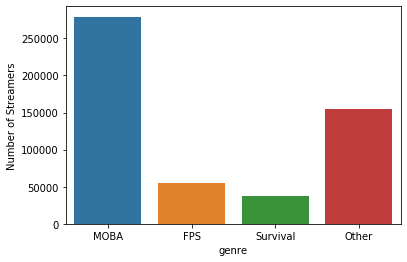

In [76]:
result = _
games_genres = result.DataFrame()
sns.barplot(data=games_genres, x='genre', y='Number of Streamers', estimator = sum, ci=None)
plt.show()